Problem 1 - startups

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd drive/MyDrive/Assignments

/content/drive/MyDrive/Assignments


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [8]:
startup=pd.read_csv("50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
startup.shape

(50, 5)

In [10]:
startup.corr()

<ipython-input-10-7b5aa6741724>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startup.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [11]:
startup.rename(columns={"R&D Spend":"RandD","Administration":"Admin","Marketing Spend":"MS"},inplace=True)
startup.head()

,RandD,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


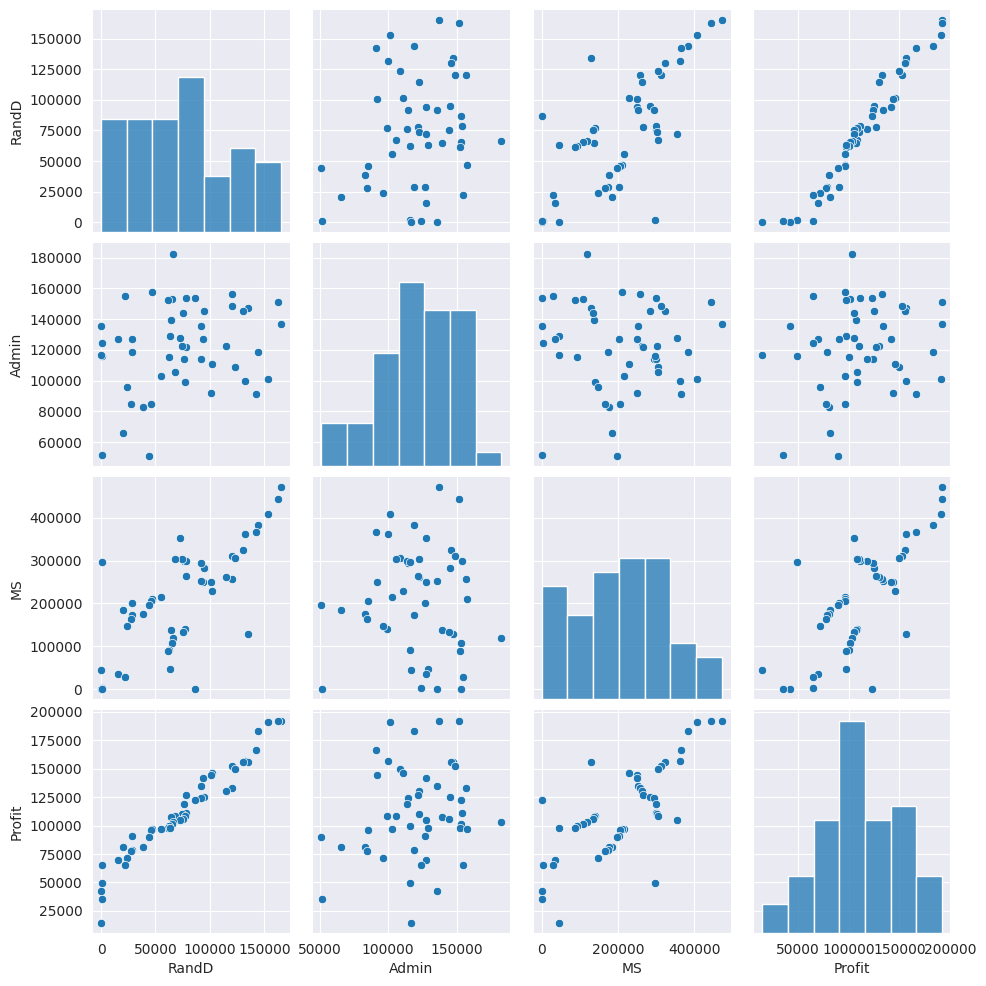

In [12]:
sns.set_style(style="darkgrid")
sns.pairplot(startup)

preparing madel

In [13]:
model1=smf.ols('Profit~RandD+Admin+MS',data=startup).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           4.53e-30
Time:                        15:19:45   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD          0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking for Assumptions

In [14]:
def get_stnd_val(val):
  return (val-val.mean())/val.std()

In [15]:
#Assumption 1 multicollinarity that is features should not be inter dependent
rsq_RandD=smf.ols('RandD~Admin+MS',data=startup).fit().rsquared
vif_RandD=1/(1-rsq_RandD)
rsq_Admin=smf.ols('Admin~RandD+MS',data=startup).fit().rsquared
vif_Admin=1/(1-rsq_Admin)
rsq_MS=smf.ols('MS~Admin+RandD',data=startup).fit().rsquared
vif_MS=1/(1-rsq_MS)

vif={'features':['RandD','Admin','MS'],'rsquare':[rsq_RandD,rsq_Admin,rsq_MS],'VIF':[vif_RandD,vif_Admin,vif_MS]}
vif_data=pd.DataFrame(vif)
vif_data

,features,rsquare,VIF
0,RandD,0.594962,2.468903
1,Admin,0.149002,1.175091
2,MS,0.570220,2.326773


In [16]:
#Testing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [17]:
def compute_vif(considered_features):
  x=startup[considered_features]
  x['intercept']=1
  vif=pd.DataFrame()
  vif["Variable"]=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif=vif[vif["Variable"]!='intercept']
  return vif

In [18]:
considered_features=["RandD","Admin","MS"]
compute_vif(considered_features).sort_values("VIF",ascending=False)

<ipython-input-17-1b3bda66df07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept']=1


,Variable,VIF
0,RandD,2.468903
2,MS,2.326773
1,Admin,1.175091


In [19]:
#checking for assumption 1
def stand_values(val):
  return(val-val.mean())/val.std()

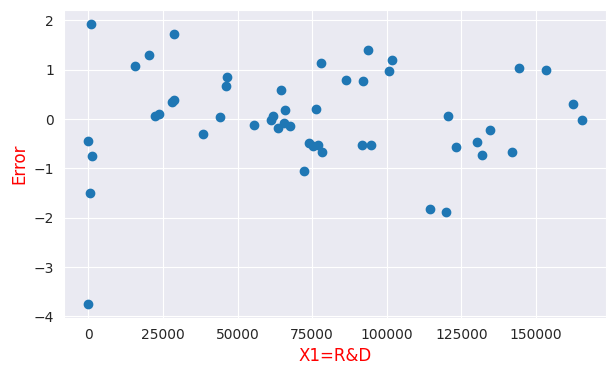

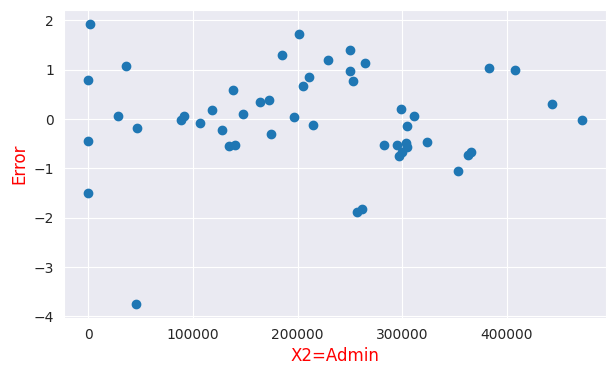

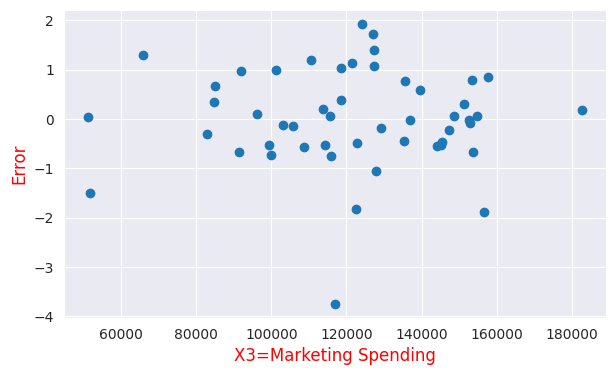

In [20]:
residul=stand_values(model1.resid)
X1=startup["RandD"]
X2=startup["MS"]
X3=startup["Admin"]
#Plotting X1 and Error
plt.figure(figsize=(7,4))
plt.scatter(X1,residul)
plt.xlabel("X1=R&D",color="red",size=12)
plt.ylabel("Error",color="red",size=12)
plt.show()
#Plotting X2 and Error
plt.figure(figsize=(7,4))
plt.scatter(X2,residul)
plt.xlabel("X2=Admin",color="red",size=12)
plt.ylabel("Error",color="red",size=12)
plt.show()
#Plotting X3 and Error
plt.figure(figsize=(7,4))
plt.scatter(X3,residul)
plt.xlabel("X3=Marketing Spending",color="red",size=12)
plt.ylabel("Error",color="red",size=12)
plt.show()

# features_val=[X1,X2,X3]
# for i in features_val:
#   plt.figure(figsize=(7,4))
#   plt.scatter(i,residul)
#   # plt.xlabel(i,color="red",size=12)
#   # plt.ylabel("Error",color="red",size=12)
#   plt.show()


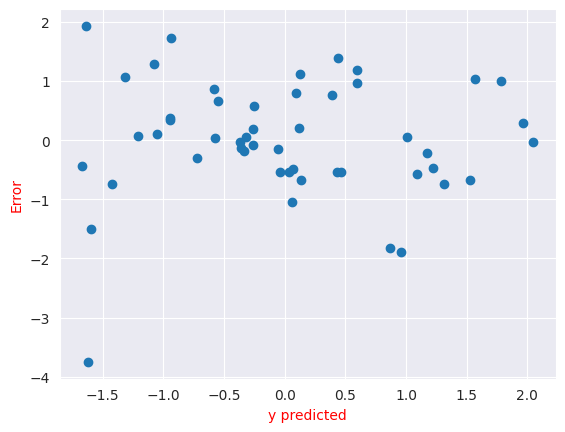

In [21]:
# Homoscadisticty
y=stand_values(model1.fittedvalues)
residul=stand_values(model1.resid)
plt.scatter(y,residul)
plt.xlabel("y predicted",size=10,color="red")
plt.ylabel("Error",size=10,color="red")
plt.show()

In [22]:
#looking for outliers
model_influence=model1.get_influence()
(c,_)=model_influence.cooks_distance

In [23]:
#defining threshold
n=5
m=50
(3*n)/m

0.3

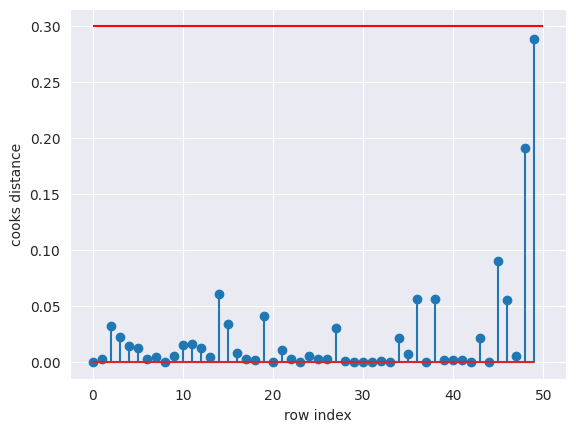

In [24]:
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.hlines(y=0.3,xmin=0,xmax=50,color="red")
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [25]:
np.where(c>0.3)

(array([], dtype=int64),)

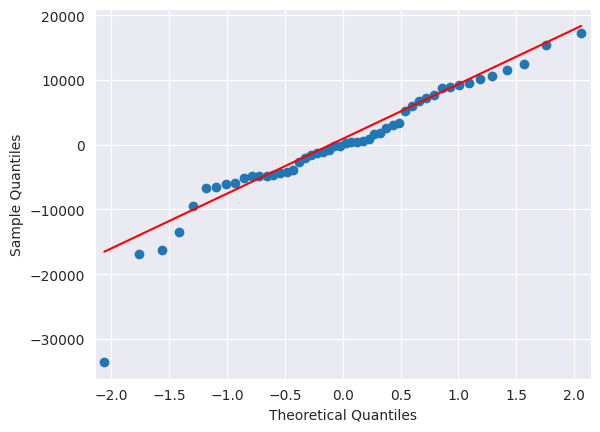

In [ ]:
qqplot=sm.qqplot(model1.resid,line="q")

In [ ]:
#testing on arbitary data
test_data=pd.DataFrame({"RandD":70000,"Admin":90000,"MS":140000},index=[0])
test_data

,RandD,Admin,MS
0,70000,90000,140000


In [ ]:
model1.predict(test_data)

0    107920.738401
dtype: float64